In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import Normalize

# sstの陸面をマスクする関数
def mask(x):
    m = ma.masked_where(x>9999, x)
    z = ma.masked_where(m==0, m)
    #f = ma.filled(z, np.nan) # for masking
    f = ma.filled(z, 0) # for filing with 0
    return f

# (緯度、経度、時間)の三次元情報を => (空間, 時間)の二次元行列に変換する関数
def latlon_to_X(var):
    # 三次元情報それぞれのshapeを取得
    imt, jmt, tmt = var.shape
    # 出力行列Xのshapeを決定
    X = np.zeros((imt*jmt, tmt))
    
    # 行列に変換
    cc = 0 # 行列Xの空間次元のインデックス
    for ii in range(0, imt):
        for jj in range(0, jmt):
            # マスクされている場合は行列に含めない
            if np.isnan(var[ii, jj, 0]) == False:
                X[cc, :] = np.squeeze(var[ii, jj, :])
                cc = cc + 1
    X = np.squeeze(X[0:cc, :]) #squeezeは長さが1の軸が存在する場合に取り除くための保険
    return X

# 二次元行列を三次元に変換する関数
def X_to_latlon(X):
    #　対象とする地域の降水データグリッドサイズが20x20の行列なので、手動でimt,jmtを設定
    imt, jmt = 20, 20
    
    SVDs = np.zeros((imt, jmt))
    
    # 行列を三次元情報に復元
    cc = 0
    for ii in range(0, imt):
        for jj in range(0, jmt):
            SVDs[ii, jj] = X[cc]
            cc += 1
    
    return SVDs

def PQ_to_latlon(P, var):
    # 行列のサイズを得る
    smt, mmt = P.shape
    imt, jmt, kmt = var.shape
    
    # 出力するデータ行列を初期化しておく(この時、最大サイズ(すべて海)を仮定)
    SVDs = np.zeros((imt, jmt, mmt))
    
    # lat-lon行列の作成
    cc = 0 # 何番目のNaNでなはない格子なのかを数えるカウンター
    for ii in range(0, imt):
        for jj in range(0, jmt):
            # マスクされている場合は行列に含めない
            if np.isnan(var[ii, jj, 0]) == False:
                SVDs[ii, jj, :] = P[cc, :]
                cc = cc + 1
            else:
                SVDs[ii, jj, :] = np.nan
    return SVDs

# sstを可視化するための関数
def show_sst(image, img_extent, vmin=-1.5, vmax=1.5):
    projection = ccrs.PlateCarree(central_longitude=180)
    cm = plt.get_cmap('seismic')

    fig = plt.figure()
    ax = plt.subplot(projection=projection)
    ax.coastlines()
    mat = ax.matshow(image,
                     origin='upper',
                     extent=img_extent,
                     transform=projection,
                     cmap=cm,
                     norm=Normalize(vmin=vmin, vmax=vmax))
    cbar = fig.colorbar(mat, 
                        extend='both',
                        spacing='proportional',
                        orientation='horizontal')
    plt.show()

# prcpを可視化するための関数
def show_prcp(image, vmin=-1.5, vmax=1.5):
    projection =ccrs.PlateCarree(central_longitude=180)
    cm = plt.get_cmap('seismic')
    img_extent = (-90, -70, 5, 25) # location=(N5-25, #90-110)
    
    fig = plt.figure()
    ax = plt.subplot(projection=projection)
    ax.coastlines()
    mat = ax.matshow(image,
                     origin='upper',
                     extent=img_extent,
                     transform=projection,
                     cmap=cm,
                     norm=Normalize(vmin=vmin, vmax=vmax)) # vminとvmaxは結果を見て見やすいように調整
    cbar = fig.colorbar(mat, 
                        extend='both',
                        spacing='proportional',
                        orientation='vertical')
    plt.show()

(42, 24, 72) (42, 20, 20)


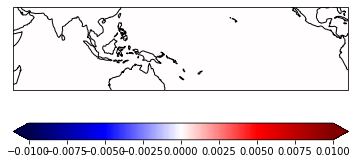

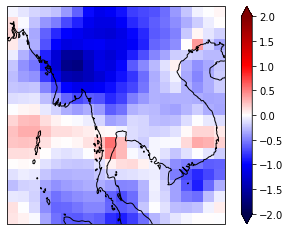

In [13]:
# テストデータのディレクトリを参照
workdir = '/docker/mnt/d/research/D2/cnn3/test'
tors_path = workdir + '/predictors/predictors_coarse_std_Apr_o_1973-2014.npy'
tand_path = workdir + '/continuous/pr_1x1_std_MJJASO_thailand_1973-2014.npy'

sst = np.squeeze(np.load(tors_path))
prcp = np.load(tand_path)
print(sst.shape, prcp.shape)

model_index = 0
img_extent = (-135, 105, -30, 30)

sst_m0_y1973 = sst[model_index, :, :]
sst_masked = mask(sst_m0_y1973)
ocean = sst_masked[6:18, 9:57]
tmp = sst_m0_y1973[6:18, 9:57]
show_sst(tmp, img_extent, vmin=-5, vmax=5)

prcp_m0_y1973 = prcp[model_index, :, :]
show_prcp(prcp_m0_y1973, vmin=-2, vmax=2)

In [ ]:
sst_m0_y1974 = sst[model_index, year_index, :, :]